In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

from manofunkcijos import *

In [4]:
DB = cnt.connect(
    host='88.223.121.130',
    port=3306,
    user='user',
    password = 'slaptazodis',
    database = 'works'
)
C = DB.cursor()

In [12]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select *, C/(select count(*) from sa)*100 as '%' from
(select * from
(select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T1
union all
select 'Others', count(*) as C
from sa
where device_brand not in
(select B from (select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T2)) as T3;"""
C.execute(sql)
ans = C.fetchall()
gamintojai, kiekiai, dalis = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [13]:
pout(ans)

Rodoma 5 eilutės iš 6
|     Samsung      |      36290       |     30.4927      |
|      Nokia       |      35186       |     29.5651      |
|    BlackBerry    |       7161       |      6.0170      |
|        LG        |       5194       |      4.3643      |
|   SonyEricsson   |       4090       |      3.4366      |
|      Others      |      31091       |     26.1243      |


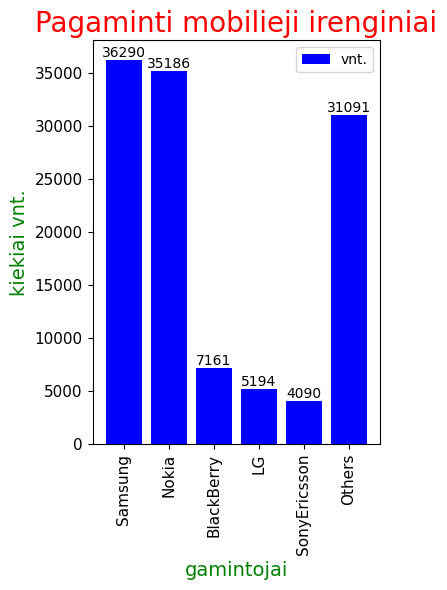

In [23]:
fig, axis = plt.subplots(figsize=(4,6))

P = axis.bar(gamintojai, kiekiai, color='blue', label='vnt.')
axis.bar_label(P)
axis.set_xlabel('gamintojai', color='green',fontsize=14)
axis.set_ylabel('kiekiai vnt.', color='green',fontsize=14)
plt.title('Pagaminti mobilieji irenginiai', fontsize=20, color='red')
axis.tick_params(axis='x', labelsize=11, rotation=90)
axis.tick_params(axis='y', labelsize=11)

axis.legend()
plt.tight_layout()
plt.show()

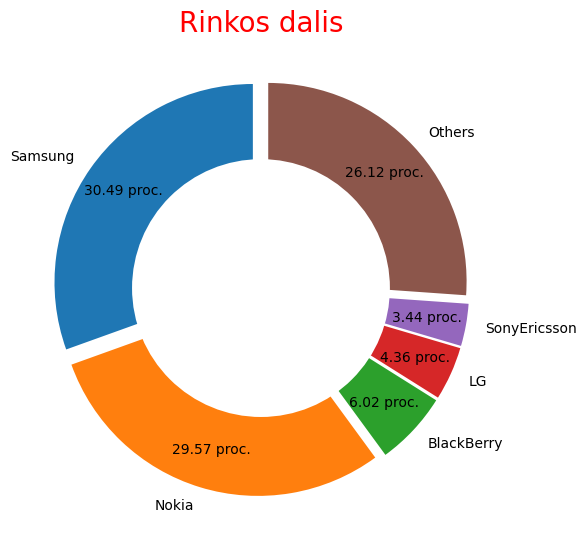

In [46]:
e = [0.1, 0, 0.1 ,0, 0.1, 0]

fig, axis = plt.subplots(figsize=(6,6))

axis.pie(dalis, 
        labels=gamintojai,
        autopct='%.2f proc.',
        textprops={'fontsize':10, 'color': 'black'},
        startangle=90,
        # move the percentage inside the arcs
        pctdistance=0.8,
        # add spaces between the arcs
        explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05,]
        )

# hole
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.title('Rinkos dalis', fontsize=20, color='red')
plt.tight_layout()
plt.show()

#pvz
# https://proclusacademy.com/blog/customize_matplotlib_piechart/